## Human Activity recognition using CNN 
- Nasir Uddin
- This notebook used dataset from http://www.cis.fordham.edu/wisdm/dataset.php 

In [47]:
#!pip install tensorflow==2.0.0-rc0

In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.1.0


/usr/local/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorboard/compat

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder


In [4]:
file = open('WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt')
lines = file.readlines()

processedList = []

for i, line in enumerate(lines):
    try:
        line = line.split(',')
        last = line[5].split(';')[0]
        last = last.strip()
        if last == '':
            break;
        temp = [line[0], line[1], line[2], line[3], line[4], last]
        processedList.append(temp)
    except:
        print('Error at line number: ', i)

Error at line number:  281873
Error at line number:  281874
Error at line number:  281875


In [5]:
processedList

[['33', 'Jogging', '49105962326000', '-0.6946377', '12.680544', '0.50395286'],
 ['33', 'Jogging', '49106062271000', '5.012288', '11.264028', '0.95342433'],
 ['33', 'Jogging', '49106112167000', '4.903325', '10.882658', '-0.08172209'],
 ['33', 'Jogging', '49106222305000', '-0.61291564', '18.496431', '3.0237172'],
 ['33', 'Jogging', '49106332290000', '-1.1849703', '12.108489', '7.205164'],
 ['33', 'Jogging', '49106442306000', '1.3756552', '-2.4925237', '-6.510526'],
 ['33', 'Jogging', '49106542312000', '-0.61291564', '10.56939', '5.706926'],
 ['33', 'Jogging', '49106652389000', '-0.50395286', '13.947236', '7.0553403'],
 ['33', 'Jogging', '49106762313000', '-8.430995', '11.413852', '5.134871'],
 ['33', 'Jogging', '49106872299000', '0.95342433', '1.3756552', '1.6480621'],
 ['33', 'Jogging', '49106982315000', '-8.19945', '19.57244', '2.7240696'],
 ['33', 'Jogging', '49107092330000', '1.4165162', '5.7886477', '2.982856'],
 ['33', 'Jogging', '49107202316000', '-1.879608', '-2.982856', '-0.2996

In [6]:
columns = ['User','Activity','Time','x','y','z']

In [7]:
data = pd.DataFrame(data = processedList,columns=columns)
data.head()

,User,Activity,Time,x,y,z
0,33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209
3,33,Jogging,49106222305000,-0.61291564,18.496431,3.0237172
4,33,Jogging,49106332290000,-1.1849703,12.108489,7.205164


In [8]:
data.shape

(343416, 6)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
User        343416 non-null object
Activity    343416 non-null object
Time        343416 non-null object
x           343416 non-null object
y           343416 non-null object
z           343416 non-null object
dtypes: object(6)
memory usage: 15.7+ MB


In [10]:
data.isnull().sum()

User        0
Activity    0
Time        0
x           0
y           0
z           0
dtype: int64

In [11]:
data['Activity'].value_counts()

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: Activity, dtype: int64

## Balance  Data

In [12]:
data['x']=data['x'].astype('float')
data['y']=data['y'].astype('float')
data['z']=data['z'].astype('float')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
User        343416 non-null object
Activity    343416 non-null object
Time        343416 non-null object
x           343416 non-null float64
y           343416 non-null float64
z           343416 non-null float64
dtypes: float64(3), object(3)
memory usage: 15.7+ MB


In [14]:
Fs = 20

In [15]:
activities = data['Activity'].value_counts().index

In [16]:
activities

Index(['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing'], dtype='object')

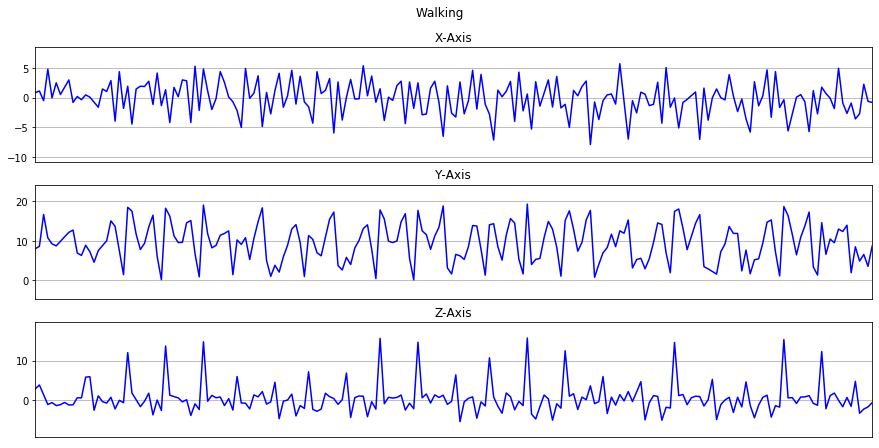

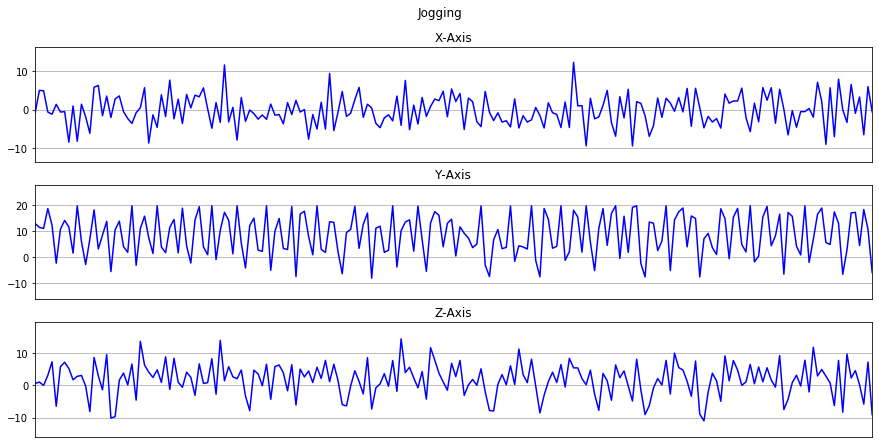

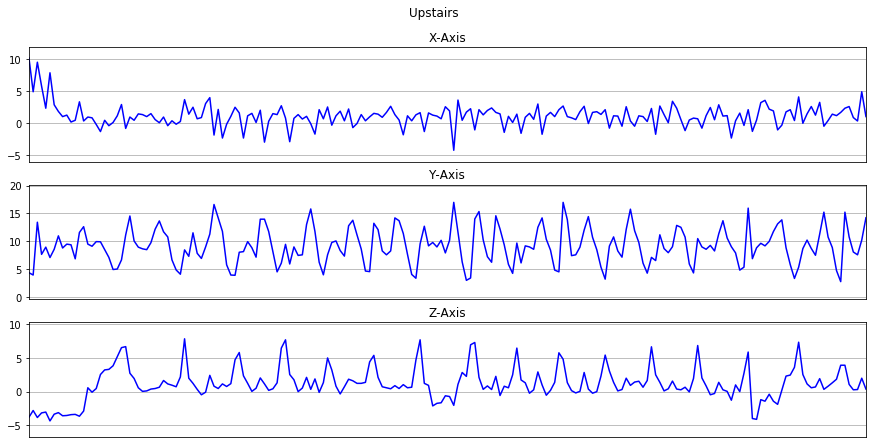

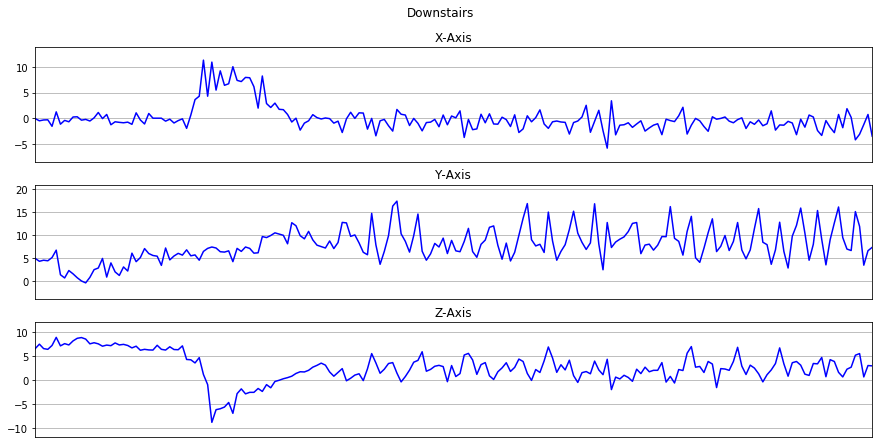

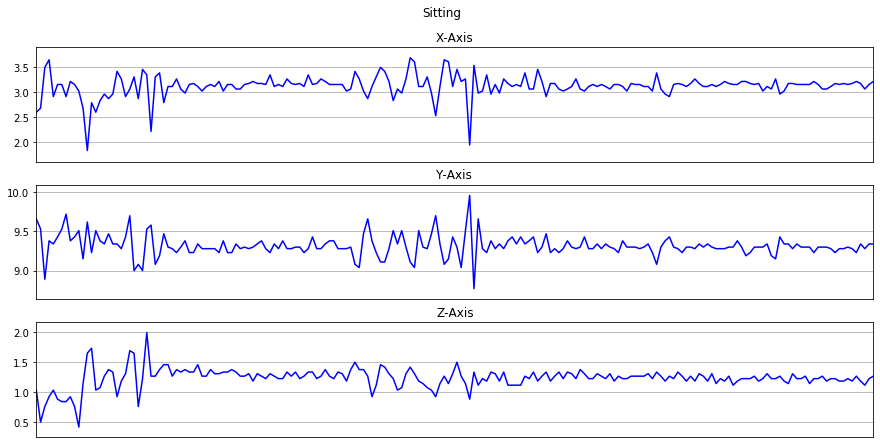

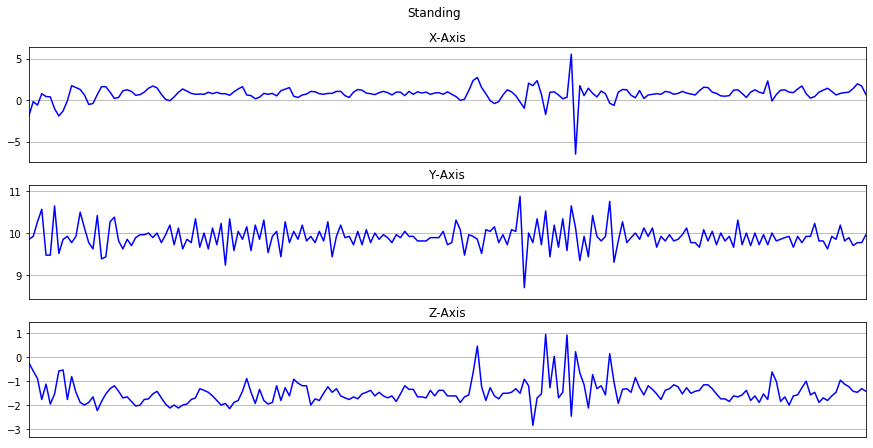

In [17]:
def plot_activity(Activity,data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 7), sharex=True)
    plot_axis(ax0, data['Time'], data['x'], 'X-Axis')
    plot_axis(ax1, data['Time'], data['y'], 'Y-Axis')
    plot_axis(ax2, data['Time'], data['z'], 'Z-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(Activity)
    plt.subplots_adjust(top=0.90)
    plt.show()
    
def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'b')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for Activity in activities:
    data_for_plot = data[(data['Activity'] == Activity)][:Fs*10]
    plot_activity(Activity, data_for_plot)

In [18]:
df=data.drop(['User','Time'],axis=1).copy()
df.head()

,Activity,x,y,z
0,Jogging,-0.694638,12.680544,0.503953
1,Jogging,5.012288,11.264028,0.953424
2,Jogging,4.903325,10.882658,-0.081722
3,Jogging,-0.612916,18.496431,3.023717
4,Jogging,-1.184970,12.108489,7.205164


In [19]:
df['Activity'].value_counts()

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: Activity, dtype: int64

In [20]:
Walking = df[df['Activity']=='Walking'].head(3555).copy()
Jogging = df[df['Activity']=='Jogging'].head(3555).copy()
Upstairs = df[df['Activity']=='Upstairs'].head(3555).copy()
Downstairs = df[df['Activity']=='Downstairs'].head(3555).copy()
Sitting = df[df['Activity']=='Sitting'].head(3555).copy()
Standing = df[df['Activity']=='Standing'].copy()

In [21]:
balanced_data = pd.DataFrame()
balanced_data = balanced_data.append([Walking, Jogging, Upstairs, Downstairs, Sitting, Standing])
balanced_data.shape

(21330, 4)

In [22]:
balanced_data['Activity'].value_counts()

Sitting       3555
Jogging       3555
Upstairs      3555
Walking       3555
Downstairs    3555
Standing      3555
Name: Activity, dtype: int64

In [23]:
balanced_data.head()

,Activity,x,y,z
597,Walking,0.844462,8.008764,2.792171
598,Walking,1.116869,8.621680,3.786457
599,Walking,-0.503953,16.657684,1.307553
600,Walking,4.794363,10.760075,-1.184970
601,Walking,-0.040861,9.234595,-0.694638


In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
label = LabelEncoder()
balanced_data['label'] = label.fit_transform(balanced_data['Activity'])
balanced_data.head()

,Activity,x,y,z,label
597,Walking,0.844462,8.008764,2.792171,5
598,Walking,1.116869,8.621680,3.786457,5
599,Walking,-0.503953,16.657684,1.307553,5
600,Walking,4.794363,10.760075,-1.184970,5
601,Walking,-0.040861,9.234595,-0.694638,5


In [26]:
label.classes_

array(['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs',
       'Walking'], dtype=object)

## Standardrizing

In [27]:
X=balanced_data[['x','y','z']]
y=balanced_data['label']

In [28]:
scaler = StandardScaler()
X= scaler.fit_transform(X)

scaled_X  = pd.DataFrame(data = X,columns = ['x','y','z'])
scaled_X['label']= y.values

scaled_X

,x,y,z,label
0,0.000503,-0.099190,0.337933,5
1,0.073590,0.020386,0.633446,5
2,-0.361275,1.588160,-0.103312,5
3,1.060258,0.437573,-0.844119,5
4,-0.237028,0.139962,-0.698386,5
...,...,...,...,...
21325,-0.470217,0.178084,0.261019,3
21326,-0.542658,0.193692,0.248875,3
21327,-0.628514,0.197593,0.261019,3
21328,-0.781444,0.049322,0.155768,3


## Frame Preparation

In [29]:
import scipy.stats as stats

In [30]:
Fs = 20
frame_size = Fs*4 # 80
hop_size = Fs*2 # 40

In [31]:
def get_frames(df, frame_size, hop_size):

    N_FEATURES = 3

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        x = df['x'].values[i: i + frame_size]
        y = df['y'].values[i: i + frame_size]
        z = df['z'].values[i: i + frame_size]
        
        # Retrieve the most often used label in this segment
        label = stats.mode(df['label'][i: i + frame_size])[0][0]
        frames.append([x, y, z])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

In [32]:
X, y = get_frames(scaled_X, frame_size, hop_size)

In [33]:
X.shape,y.shape        #(3555*)/40

((532, 80, 3), (532,))

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [35]:
X_train.shape, X_test.shape

((425, 80, 3), (107, 80, 3))

In [36]:
X_train[0].shape, X_test[0].shape

((80, 3), (80, 3))

In [37]:
X_train = X_train.reshape(425, 80, 3, 1)
X_test = X_test.reshape(107, 80, 3, 1)

In [38]:
X_train[0].shape, X_test[0].shape

((80, 3, 1), (80, 3, 1))

## Build 2D CNN Model

In [39]:
model = Sequential()
model.add(Conv2D(16, (2, 2), activation = 'relu', input_shape = X_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))

In [40]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [41]:
history = model.fit(X_train, y_train, epochs = 10, validation_data= (X_test, y_test), verbose=1)


Train on 425 samples, validate on 107 samples
Epoch 1/10
425/425 [==============================] - 0s 895us/sample - loss: 1.5873 - accuracy: 0.2988 - val_loss: 1.2304 - val_accuracy: 0.5327
Epoch 2/10
425/425 [==============================] - 0s 133us/sample - loss: 1.1500 - accuracy: 0.5671 - val_loss: 0.8739 - val_accuracy: 0.7383
Epoch 3/10
425/425 [==============================] - 0s 121us/sample - loss: 0.8534 - accuracy: 0.7153 - val_loss: 0.5929 - val_accuracy: 0.7850
Epoch 4/10
425/425 [==============================] - 0s 128us/sample - loss: 0.5944 - accuracy: 0.8071 - val_loss: 0.4755 - val_accuracy: 0.8505
Epoch 5/10
425/425 [==============================] - 0s 128us/sample - loss: 0.5027 - accuracy: 0.8141 - val_loss: 0.3805 - val_accuracy: 0.8505
Epoch 6/10
425/425 [==============================] - 0s 123us/sample - loss: 0.3384 - accuracy: 0.8918 - val_loss: 0.2572 - val_accuracy: 0.8879
Epoch 7/10
425/425 [==============================] - 0s 126us/sample - loss: 

In [42]:
history.history

{'loss': [1.5873285254310159,
  1.1499975724781262,
  0.8533934576371137,
  0.594434003128725,
  0.5027229633050806,
  0.33844871759414674,
  0.28646566264769613,
  0.2533832508150269,
  0.20234801195123617,
  0.17520386864157284],
 'accuracy': [0.29882354,
  0.5670588,
  0.7152941,
  0.8070588,
  0.81411767,
  0.8917647,
  0.91294116,
  0.91294116,
  0.9505882,
  0.9435294],
 'val_loss': [1.2304020830403979,
  0.8739178982850547,
  0.592861160496685,
  0.4755473908419921,
  0.38053590073206717,
  0.257236765088322,
  0.24026740356304935,
  0.2383696868597904,
  0.22170234374075293,
  0.22656432748119407],
 'val_accuracy': [0.53271025,
  0.7383177,
  0.78504676,
  0.85046726,
  0.85046726,
  0.88785046,
  0.88785046,
  0.89719623,
  0.88785046,
  0.8785047]}

## Ploting Learning Curve

In [43]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

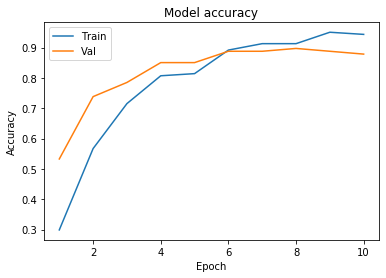

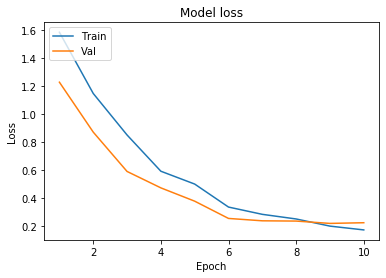

In [44]:
plot_learningCurve(history, 10)

## Ploting Confusion Matrix

In [48]:
#!pip3 install mlxtend

  Using cached https://files.pythonhosted.org/packages/52/04/c362f34f666f0ddc7cf593805e64d64fa670ed96fd9302e68549dd48287d/mlxtend-0.17.0-py2.py3-none-any.whl


In [49]:
import mlxtend
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [50]:
y_pred = model.predict_classes(X_test)

(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdb1ec79978>)

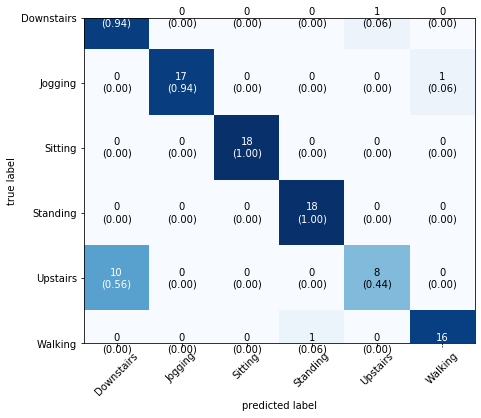

In [51]:
mat =mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, class_names=label.classes_, show_normed=True, figsize=(7,7))

model.save_weights('cnn_model.h5')